#Machine Learning Project Report - Heart Failure Prediction - Santanam Wishal - kianaaa19

## 1. Import Libraries

In [31]:
!pip install shap
!pip install scikit-learn

In [32]:
# Import libraries that will be needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import zipfile
from google.colab import files
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import shap

#Explanation:

### 1. **Importing Libraries for Data Science and Machine Learning**

- **`pandas`**: A powerful library for data manipulation and analysis, providing data structures such as DataFrames for handling structured data.
- **`numpy`**: A fundamental package for scientific computing, offering support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- **`matplotlib.pyplot`**: A widely used library for creating static, animated, and interactive visualizations in Python. It helps in plotting graphs such as line plots, bar charts, histograms, etc.
- **`seaborn`**: Built on top of `matplotlib`, seaborn provides a high-level interface for drawing attractive and informative statistical graphics, simplifying complex visualizations.
  
### 2. **Machine Learning Libraries**

- **`sklearn.model_selection`**:
  - **`train_test_split`**: A utility function to split the dataset into training and testing sets, crucial for evaluating machine learning models.
  - **`GridSearchCV`**: Used for hyperparameter tuning by exhaustively searching over a specified parameter grid to find the optimal parameters for a model.
  
- **`sklearn.preprocessing`**:
  - **`StandardScaler`**: A tool for standardizing features by removing the mean and scaling to unit variance, which helps improve the performance of many machine learning algorithms.

- **`sklearn.linear_model`**:
  - **`LogisticRegression`**: A statistical model used for binary classification tasks, predicting the probability of a categorical dependent variable based on one or more predictor variables.

- **`sklearn.ensemble`**:
  - **`RandomForestClassifier`**: An ensemble method based on decision trees, used for classification tasks. It works by building multiple decision trees and combining their results to improve accuracy.
  
- **`sklearn.svm`**:
  - **`SVC`**: Support Vector Classification, a powerful algorithm used for classification tasks. It works by finding the hyperplane that best separates different classes in the feature space.

- **`sklearn.naive_bayes`**:
  - **`GaussianNB`**: A variant of the Naive Bayes classifier that assumes the features follow a normal (Gaussian) distribution. It is often used for text classification and other probabilistic tasks.
  
- **`sklearn.metrics`**:
  - Various evaluation metrics to assess model performance:
    - **`accuracy_score`**: Measures the proportion of correctly classified instances.
    - **`precision_score`**: Assesses the proportion of true positive results among all positive predictions.
    - **`recall_score`**: Measures the proportion of true positive results among all actual positives.
    - **`f1_score`**: A harmonic mean of precision and recall, used when we need a balance between the two.
    - **`roc_auc_score`**: Measures the area under the Receiver Operating Characteristic curve, which is useful for evaluating classification models.
    - **`confusion_matrix`**: A table used to describe the performance of a classification model, showing the true positive, true negative, false positive, and false negative counts.

### 3. **Additional Libraries**

- **`zipfile`**: Provides tools for reading and writing ZIP files, useful for handling compressed datasets.
- **`google.colab.files`**: A module to upload and access files directly in a Google Colab environment.
  
### 4. **Deep Learning Libraries**

- **`tensorflow.keras.models`**:
  - **`Sequential`**: A linear stack of neural network layers for building deep learning models in Keras.
  
- **`tensorflow.keras.layers`**:
  - **`Dense`**: Fully connected layers in a neural network, which are commonly used in various types of deep learning models.

### 5. **Other Libraries**

- **`xgboost.XGBClassifier`**: A gradient boosting framework used for classification tasks. It is known for its high performance and efficiency in dealing with large datasets.
- **`sklearn.model_selection` (cross_val_score)**: A function for evaluating the performance of a model using cross-validation, ensuring that the model generalizes well to unseen data.
- **`imblearn.over_sampling.SMOTE`**: Synthetic Minority Over-sampling Technique (SMOTE) helps address class imbalance by generating synthetic samples for the minority class.
- **`shap`**: A library used for model interpretability, providing tools to explain the output of machine learning models through visualizations and feature importance.

These libraries together form a robust toolkit for data processing, machine learning, model evaluation, and model interpretability. They allow for efficient and effective handling of various tasks in a typical data science pipeline.

## 2. Load and Prepare Data

1. **Install Kaggle API**: The **`kaggle`** package is installed and used to upload the Kaggle API key for authentication.
2. **Set Up Kaggle Authentication**: The API key is moved to the correct directory (`~/.kaggle/`) and file permissions are adjusted for security.
3. **Download Dataset**: The **"Heart Failure Prediction"** dataset is downloaded from Kaggle using the Kaggle API.
4. **Unzip Dataset**: The downloaded ZIP file is unzipped, extracting the **`heart.csv`** dataset.
5. **Load Data**: The CSV file is loaded into a **Pandas DataFrame** for further analysis.



First, we install the kaggle package, which allows us to interact with Kaggle directly from Google Colab. Once the package is installed, we upload the **Kaggle API** key to authenticate our account and gain access to the datasets.

In [5]:
!pip install -q kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"santanamwishal","key":"0000000000000000000000000000"}'}

Next, we create the necessary directory (~/.kaggle) to store the API key, move the kaggle.json file into that directory, and then set the correct permissions to keep the API key secure.

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Now, we use the Kaggle API to download the dataset. In this case, we are downloading the "Heart Failure Prediction" dataset from Kaggle, which is available at the following URL: [Heart Failure Prediction Dataset on Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

In [8]:
!kaggle datasets download -d 'fedesoriano/heart-failure-prediction'

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 16.7MB/s]


Once the dataset is downloaded, the file heart-failure-prediction.zip will be saved to the /content directory in Google Colab. After downloading the ZIP file, we proceed to unzip the contents to the /content directory. In this case, the ZIP file contains the heart.csv file, which holds the heart failure dataset.

In [9]:
!unzip /content/heart-failure-prediction.zip -d /content

Archive:  /content/heart-failure-prediction.zip
  inflating: /content/heart.csv      


Finally, we load the dataset into a Pandas DataFrame using the read_csv() function, which allows us to perform data manipulation and analysis on the dataset.

In [11]:
# Read dataset
df = pd.read_csv('heart.csv')

Now, the dataset is loaded and ready for further exploration, analysis, and preprocessing.

In [12]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The dataset is now ready for exploration and preprocessing.

# 3. Exploratory Data Analysis (EDA)



Explanation:

###Exploratory Data Analysis (EDA) plays a crucial role in gaining insights into the characteristics of a dataset. It helps us understand important aspects such as the distribution of the target variable, correlations between different features, and potential patterns or trends within the data. By visually representing the data, EDA makes it easier to interpret complex relationships and identify underlying structures. These visualizations not only facilitate a deeper understanding of the dataset but also guide decision-making in subsequent steps, such as feature selection, model building, and data preprocessing. In summary, EDA provides a foundation for more informed and effective analyses, ensuring that the model development process is based on a solid understanding of the data.

In [14]:
# Display the first few rows of the dataset
print(df.head())

# Information about the dataset
print(df.info())

# Descriptive statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

### Explanation:

The dataset contains 918 records with 12 columns, each representing a different feature related to heart disease prediction. Here’s a detailed breakdown of the dataset:

1. **Columns in the dataset:**
   - **Age**: Age of the patient (numeric).
   - **Sex**: Gender of the patient (categorical: 'M' for male, 'F' for female).
   - **ChestPainType**: Type of chest pain (categorical: ATA = typical angina, NAP = non-anginal pain, ASY = asymptomatic, and others).
   - **RestingBP**: Resting blood pressure (numeric).
   - **Cholesterol**: Cholesterol level (numeric).
   - **FastingBS**: Fasting blood sugar (binary: 0 = normal, 1 = above 120 mg/dl).
   - **RestingECG**: Resting electrocardiogram results (categorical: 'Normal', 'ST', 'LVH').
   - **MaxHR**: Maximum heart rate achieved (numeric).
   - **ExerciseAngina**: Whether the patient experiences exercise-induced angina (binary: 'Y' = yes, 'N' = no).
   - **Oldpeak**: Depression induced by exercise relative to rest (numeric).
   - **ST_Slope**: Slope of the peak exercise ST segment (categorical: 'Up', 'Flat', 'Down').
   - **HeartDisease**: Target variable indicating whether the patient has heart disease (binary: 0 = no, 1 = yes).

2. **Dataset Summary**:
   - **Rows**: 918 data points (patients).
   - **Columns**: 12 features, including the target variable **HeartDisease**.
   - All columns have **non-null values**, meaning there are no missing values in the dataset, as confirmed by the result of `df.isnull().sum()` (which shows 0 for all columns).

3. **Descriptive Statistics**:
   - The **mean** and **standard deviation (std)** of the numerical features give us a sense of the central tendency and variability of the data:
     - **Age**: The average age of patients is around 53.5 years, with a standard deviation of 9.43 years.
     - **RestingBP**: The average resting blood pressure is 132.4 mmHg, with a wide range (from 0 to 200 mmHg).
     - **Cholesterol**: The average cholesterol level is 198.8 mg/dl, with values ranging from 0 to 603 mg/dl.
     - **MaxHR**: The average maximum heart rate achieved is 136.8 bpm, with values ranging from 60 to 202 bpm.
     - **Oldpeak**: The average depression induced by exercise is 0.89, ranging from -2.6 to 6.2.
   - For the **target variable (HeartDisease)**:
     - The **mean** is 0.553, indicating that approximately 55% of the patients in the dataset have heart disease (since 1 represents having heart disease).
     - The **standard deviation** is 0.497, indicating variability in the distribution of heart disease across the dataset.

4. **No Missing Values**:
   - All features have no missing data, as verified by the `isnull().sum()` function. This suggests the dataset is clean in terms of missing values, making it ready for further analysis or model training.

### Conclusion:

The dataset is relatively clean and ready for analysis. It contains 918 samples with 12 features, including both numerical and categorical data. The next steps would likely involve further exploratory data analysis (EDA), feature engineering, and eventually model building for heart disease prediction. The dataset has a balanced number of positive and negative cases of heart disease (about 55% with heart disease), which may influence the choice of model and evaluation metrics.

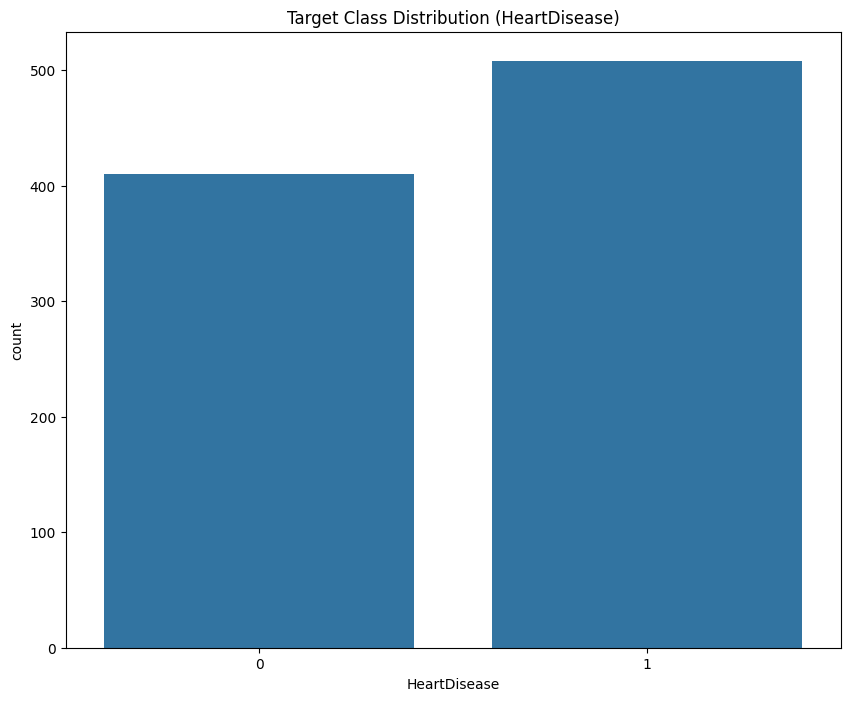

In [15]:
# Visualize the distribution of the target class
plt.figure(figsize=(10, 8))
sns.countplot(x='HeartDisease', data=df)
plt.title('Target Class Distribution (HeartDisease)')
plt.show()

The bar chart visualizes the class distribution of the target variable "HeartDisease." It presents the count of two categories: individuals without heart disease (label "0") and those with heart disease (label "1").

From the visualization:
- The count for label "0" is slightly less than that for label "1."
- The class distribution appears relatively balanced, though there is a minor prevalence of class "1."

Such a distribution is advantageous for machine learning models since it reduces the risk of class imbalance, which can otherwise skew model performance. However, slight overrepresentation of class "1" might still require monitoring during training, especially when calculating performance metrics.

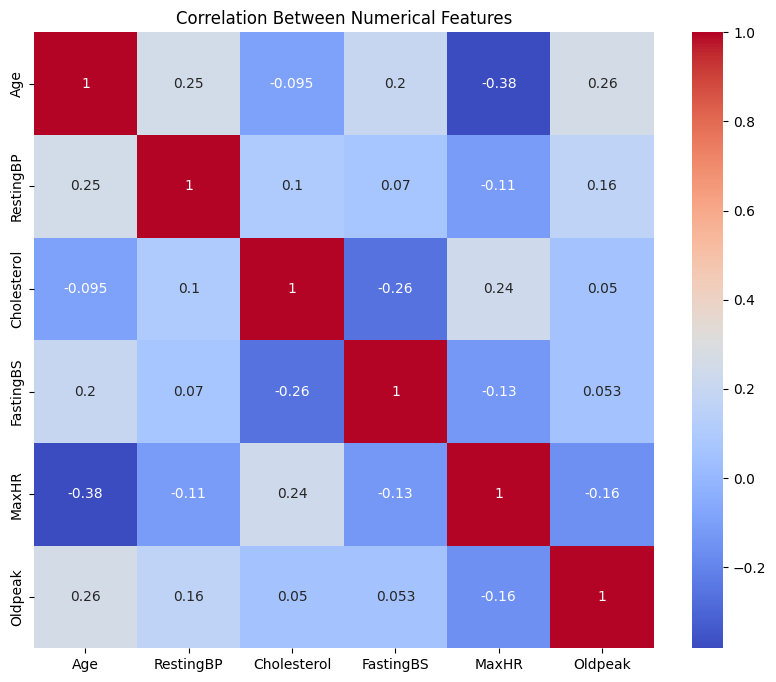

In [16]:
# Visualize the correlation between numerical features
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

The heatmap illustrates the correlation matrix for various numerical features related to heart disease. The correlation coefficient ranges from -1 to 1, where:

- A positive value indicates a direct relationship between two variables.
- A negative value indicates an inverse relationship.
- A value near 0 signifies little to no linear correlation.

### Key Observations:
1. **Age and MaxHR (Maximum Heart Rate):**
   - There is a moderate negative correlation (-0.38), suggesting that as age increases, the maximum heart rate tends to decrease.

2. **Age and Oldpeak (ST Depression):**
   - A slight positive correlation (0.26) exists, implying that older individuals may experience higher ST depression levels.

3. **Cholesterol and FastingBS (Fasting Blood Sugar):**
   - A mild negative correlation (-0.26) is observed, indicating a weak inverse relationship between these features.

4. **RestingBP (Resting Blood Pressure) and Other Features:**
   - RestingBP shows weak positive correlations with most features, indicating limited linear relationships.

5. **FastingBS and Cholesterol:**
   - The negative correlation (-0.26) suggests a slight inverse trend.

Overall, the features exhibit relatively weak correlations with each other, apart from the moderate negative correlation between Age and MaxHR. This insight can guide feature engineering and selection processes, particularly for identifying redundancies or understanding feature importance.

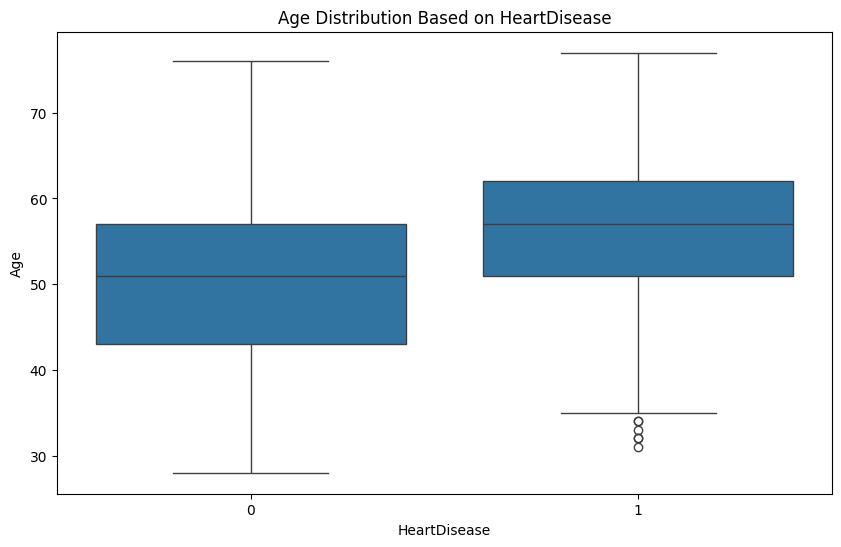

In [17]:
# Visualize the distribution of age based on HeartDisease
plt.figure(figsize=(10, 6))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age Distribution Based on HeartDisease')
plt.show()

This box plot visualizes the distribution of age between individuals with heart disease (HeartDisease = 1) and those without (HeartDisease = 0).

* **X-axis**: Represents the heart disease status (0 = no, 1 = yes).
* **Y-axis**: Represents the age range.

Interpretation:

- **Median Age**: Individuals with heart disease tend to have a higher median age compared to those without heart disease. The horizontal line within the box in each category indicates the median age.
- **Interquartile Range (IQR)**: The range between the first and third quartiles provides an overview of the age distribution for the middle 50% of the data. In this visualization, the IQR for the group with heart disease is slightly wider, indicating a slightly greater variation in age within this group.
- **Outliers**: Data points that lie outside the "whiskers" of the box plot are considered outliers. In the group with heart disease, there are a few outliers at younger ages, indicating the presence of some individuals with heart disease at relatively younger ages compared to the majority of the group.

Overall, this visualization suggests that age is a significant risk factor for heart disease. Older individuals tend to have a higher risk of developing heart disease. However, it is important to note that correlation does not always imply causation. Other factors such as lifestyle, genetics, and other medical conditions can also influence the risk of heart disease.

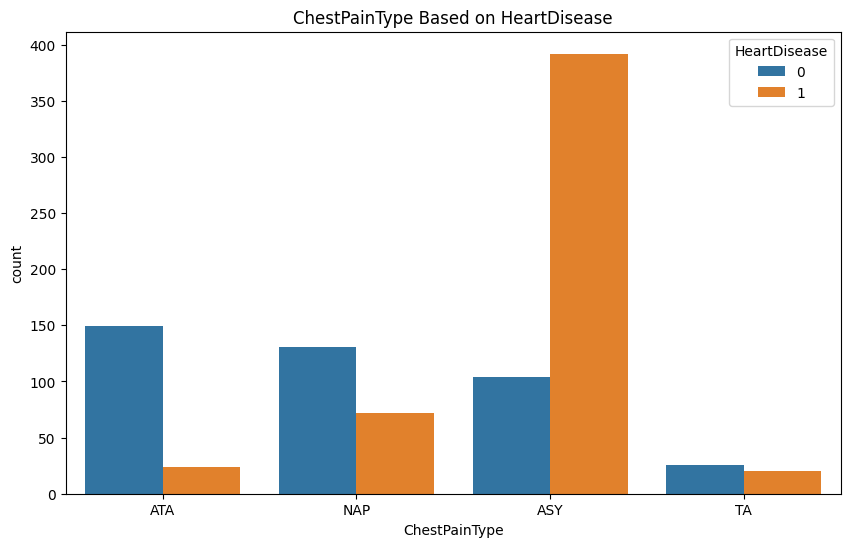

In [18]:
# Visualize ChestPainType based on HeartDisease
plt.figure(figsize=(10, 6))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title('ChestPainType Based on HeartDisease')
plt.show()

This bar chart presents a comparison of the distribution of chest pain types (ChestPainType) between individuals with and without heart disease (HeartDisease).

Key Observations:

- **Prevalence of Chest Pain Types:** The chart reveals that "ASY" (Asymptomatic) is the most common chest pain type across both heart disease and non-heart disease groups. This suggests that asymptomatic chest pain is prevalent in the population, regardless of heart disease status.

Heart Disease Association:

* **ASY**: While "ASY" is the most frequent type overall, it is notably higher in the heart disease group. This indicates that individuals with heart disease are more likely to experience asymptomatic chest pain.
* **TA**: "TA" (Typical Angina) is significantly more common in the heart disease group compared to the non-heart disease group. This aligns with the understanding that typical angina is a classic symptom of coronary artery disease.
* **ATA & NAP**: "ATA" (Atypical Angina) and "NAP" (Non-Anginal Pain) show a less pronounced difference between the two groups. However, there is a slight trend towards higher frequencies in the heart disease group.

Interpretation:

The chart underscores the importance of considering chest pain type in assessing the risk of heart disease. While asymptomatic chest pain is common, its higher prevalence in the heart disease group highlights the need for further investigation and potential risk stratification. The association between typical angina and heart disease further reinforces its diagnostic significance.

## 4. Data Preparation

This part is focused on preparing data for machine learning by encoding categorical features, splitting the dataset, and normalizing the features.

1. **Categorical Feature Encoding**:
   - The function `encode_categorical` utilizes `pd.get_dummies()` to apply **one-hot encoding** to categorical features. This method converts each categorical value into a separate binary column, making the data numerical and suitable for machine learning models.
   - The code loops through the specified `categorical_features` list, applying the encoding to each feature in the dataset (`df`).

2. **Feature and Target Separation**:
   - After encoding, the dataset is divided into features (`X`) and the target variable (`y`). The target variable here is 'HeartDisease', which is separated to facilitate model training and evaluation.

3. **Train-Test Split**:
   - The data is split into training and testing subsets using an 80:20 ratio (`test_size=0.2`) through the `train_test_split` function. This ensures the model can be trained on one portion of the data while being tested on unseen data, enabling unbiased evaluation.

4. **Feature Normalization**:
   - The `StandardScaler` is used to normalize the features. This scales all numerical features to have a mean of 0 and a standard deviation of 1.
   - Normalization ensures that features with different ranges (e.g., blood pressure vs. cholesterol levels) do not disproportionately influence the model's performance.

### Importance:
- **Encoding**: Converts categorical data into a format compatible with machine learning algorithms.
- **Splitting**: Separates data for training and evaluation to prevent overfitting.
- **Normalization**: Ensures stability and performance, especially for distance-based algorithms (e.g., SVM, k-NN) and optimization methods like gradient descent.

In [19]:
# Function to encode categorical features
def encode_categorical(df, column):
    return pd.get_dummies(df, columns=[column], prefix=column)

# Encoding categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for feature in categorical_features:
    df = encode_categorical(df, feature)

# Separate features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Model Development and Evaluation


---

Explaination:
### **Function: `train_evaluate_model`**
1. **Training and Prediction**:
   - The `model.fit()` function trains the model on the training data.
   - Predictions are generated using `model.predict()` for classification and `model.predict_proba()` for probabilistic outputs (needed for the ROC-AUC metric).

2. **Evaluation Metrics**:
   - **Accuracy**: Proportion of total correct predictions.
   - **Precision**: Fraction of correctly predicted positive instances out of all predicted positives.
   - **Recall**: Fraction of actual positives correctly identified.
   - **F1-score**: Harmonic mean of precision and recall, balancing the trade-off between the two.
   - **ROC-AUC**: Evaluates the model's ability to distinguish between classes based on predicted probabilities.

3. **Confusion Matrix Visualization**:
   - The confusion matrix provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.
   - A heatmap visualization makes it easier to interpret the model's classification performance.

---

### **Models Implemented**:
1. **Logistic Regression**:
   - A simple, interpretable model suitable for linear relationships.
   - Ideal for datasets where the target variable has a linear association with features.

2. **Random Forest**:
   - An ensemble method using decision trees.
   - Captures non-linear relationships and provides feature importance for interpretability.

3. **Support Vector Machine (SVM)**:
   - Effective in high-dimensional spaces and can handle complex decision boundaries.
   - The `probability=True` parameter enables ROC-AUC computation.

4. **Naive Bayes**:
   - Based on Bayes' Theorem, assuming feature independence.
   - Fast and efficient, especially for large datasets or text-based data.

---

### **Evaluation Strategy**:
- **Metrics**: By using multiple metrics (accuracy, precision, recall, F1, ROC-AUC), the evaluation ensures a well-rounded view of each model's performance.
- **Confusion Matrix**: Highlights specific types of errors, such as false positives and false negatives, for targeted improvement.

This code is a robust pipeline for testing and comparing different classification models on a given dataset. By focusing on diverse metrics, it ensures that the models' strengths and weaknesses are thoroughly evaluated.



In [20]:
# Function to train and Evaluate Machine Learning Models
def train_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Logistic Regression Results:
Accuracy: 0.8533
Precision: 0.9000
Recall: 0.8411
F1-score: 0.8696
ROC-AUC: 0.9266


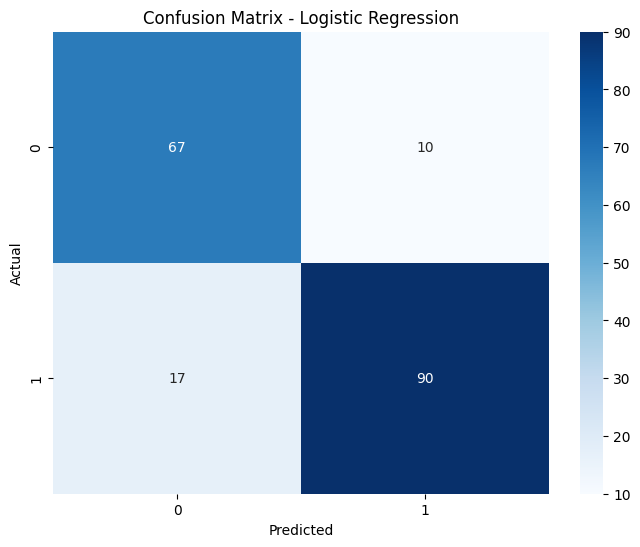

In [21]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
train_evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

Random Forest Results:
Accuracy: 0.8804
Precision: 0.9048
Recall: 0.8879
F1-score: 0.8962
ROC-AUC: 0.9433


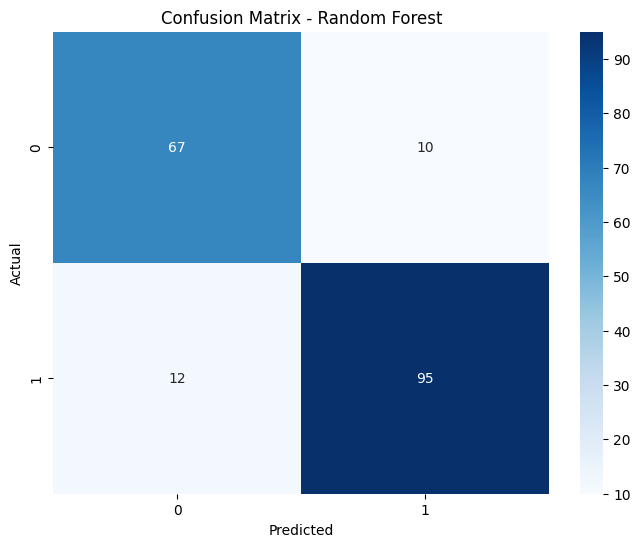

In [22]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
train_evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest")

SVM Results:
Accuracy: 0.8913
Precision: 0.9143
Recall: 0.8972
F1-score: 0.9057
ROC-AUC: 0.9325


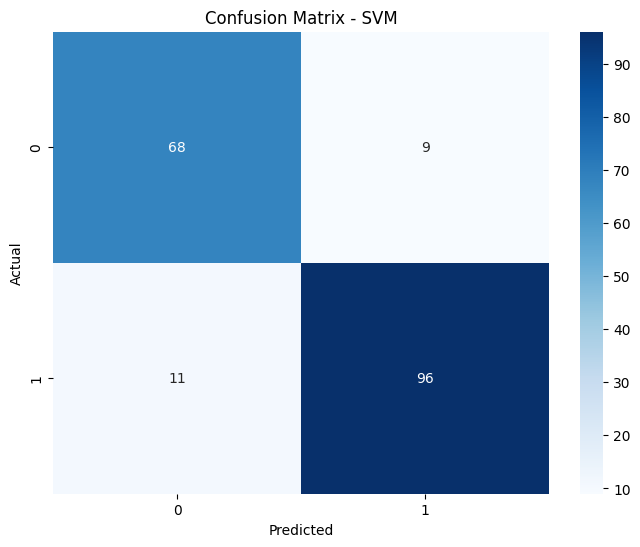

In [23]:
# Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
train_evaluate_model(svm_model, X_train_scaled, X_test_scaled, y_train, y_test, "SVM")

Naive Bayes Results:
Accuracy: 0.8641
Precision: 0.9271
Recall: 0.8318
F1-score: 0.8768
ROC-AUC: 0.9244


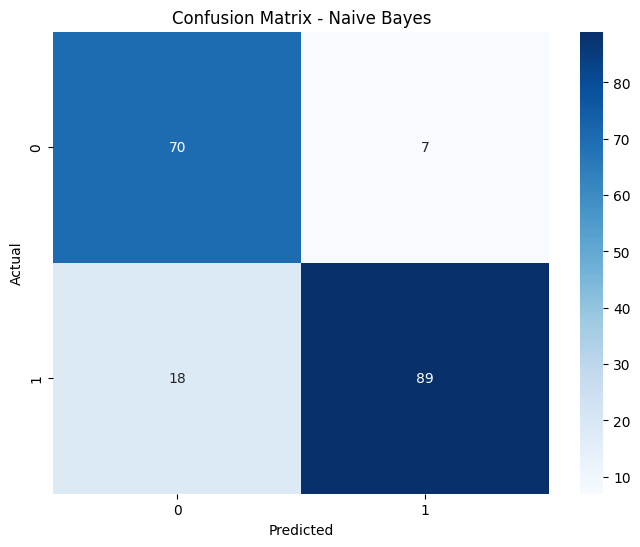

In [24]:
# Naive Bayes
nb_model = GaussianNB()
train_evaluate_model(nb_model, X_train_scaled, X_test_scaled, y_train, y_test, "Naive Bayes")

### **Comparison Table**

| Metric          | Logistic Regression | Random Forest | SVM           | Naive Bayes    |
|------------------|---------------------|---------------|---------------|----------------|
| **Accuracy**     | 0.8533              | 0.8804        | **0.8913**    | 0.8641         |
| **Precision**    | 0.9000              | 0.9048        | **0.9143**    | 0.9271         |
| **Recall**       | 0.8411              | 0.8879        | **0.8972**    | 0.8318         |
| **F1-score**     | 0.8696              | 0.8962        | **0.9057**    | 0.8768         |
| **ROC-AUC**      | 0.9266              | **0.9433**    | 0.9325        | 0.9244         |

---

### **Analysis**
1. **Accuracy**:
   - **SVM** achieves the highest accuracy (89.13%), indicating it makes the most correct predictions overall.

2. **Precision**:
   - **Naive Bayes** has the highest precision (92.71%), meaning it is the most reliable in predicting positive cases without false alarms.
   - However, this comes at the cost of slightly lower recall.

3. **Recall**:
   - **SVM** stands out with the highest recall (89.72%), showing its effectiveness in identifying actual positive cases.

4. **F1-score**:
   - **SVM** achieves the highest F1-score (90.57%), demonstrating a strong balance between precision and recall.

5. **ROC-AUC**:
   - **Random Forest** excels with the highest ROC-AUC (94.33%), suggesting it performs best in distinguishing between classes based on probability scores.

---

### **Best Model**
- Based on the metrics, **SVM** emerges as the overall best model due to its superior performance in **accuracy, recall, and F1-score**, which are critical for balanced classification tasks.
- However, because the primary goal is probabilistic decision-making or ranking positive predictions, **Random Forest** with the highest ROC-AUC might be preferred.

## 6. Feature Importance (Random Forest)

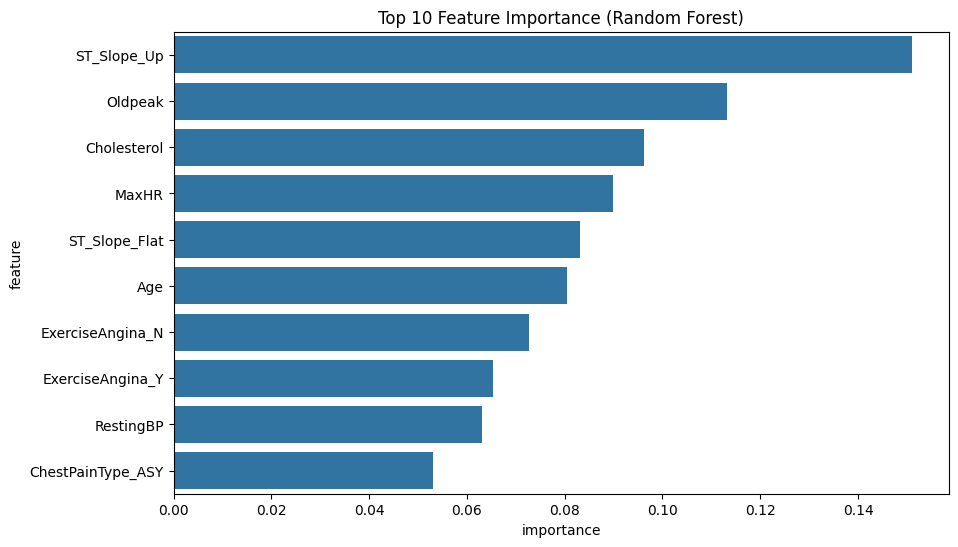

              feature  importance
19        ST_Slope_Up    0.150948
5             Oldpeak    0.113274
2         Cholesterol    0.096225
4               MaxHR    0.089923
18      ST_Slope_Flat    0.083204
0                 Age    0.080382
15   ExerciseAngina_N    0.072656
16   ExerciseAngina_Y    0.065329
1           RestingBP    0.063082
8   ChestPainType_ASY    0.053019


In [25]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance (Random Forest)')
plt.show()

print(feature_importance.head(10))

Features and Importance:

* ST_Slope_Up: This feature has the highest importance, suggesting that the slope of the ST segment during exercise is a strong predictor of heart disease.
- Oldpeak: The ST depression induced by exercise relative to rest is also a significant predictor.
- Cholesterol: Cholesterol levels play a crucial role in heart disease risk.
- MaxHR: Maximum heart rate reached during exercise is another important factor.
- ST_Slope_Flat: The flat slope of the ST segment during exercise is also associated with heart disease risk.
- Age: Older age is a well-established risk factor.
- ExerciseAngina_N and ExerciseAngina_Y: Whether or not the patient experiences exercise-induced angina is relevant.
- RestingBP: Resting blood pressure contributes to the risk assessment.
- ChestPainType_ASY: Asymptomatic chest pain is also considered a risk factor.

## 7. Hyperparameter Tuning

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.8787251887056193
Tuned Random Forest Results:
Accuracy: 0.8804
Precision: 0.8972
Recall: 0.8972
F1-score: 0.8972
ROC-AUC: 0.9461


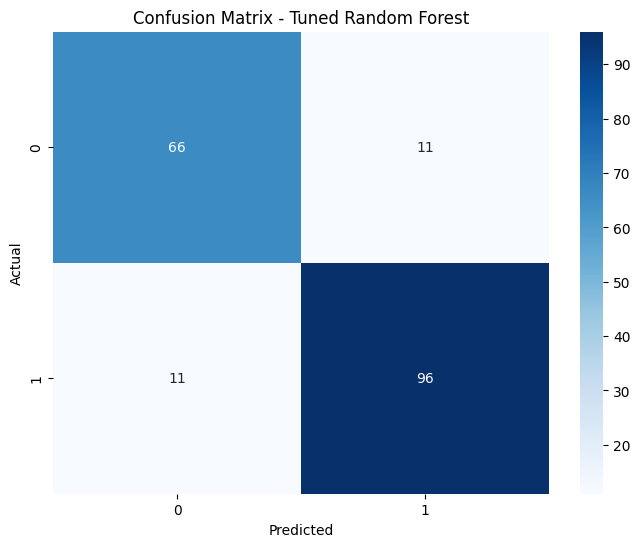

In [26]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

print("Best parameters:", rf_grid.best_params_)
print("Best cross-validation score:", rf_grid.best_score_)

# Evaluation for tuned Random Forest model
train_evaluate_model(rf_grid.best_estimator_, X_train_scaled, X_test_scaled, y_train, y_test, "Tuned Random Forest")


### **Comparison Before and After Tuning**

| Metric          | Random Forest (Default) | Tuned Random Forest |
|------------------|--------------------------|----------------------|
| **Accuracy**     | 0.8804                   | 0.8804               |
| **Precision**    | 0.9048                   | 0.8972               |
| **Recall**       | 0.8879                   | **0.8972**           |
| **F1-score**     | 0.8962                   | **0.8972**           |
| **ROC-AUC**      | 0.9433                   | **0.9461**           |

---

### **Key Observations**
1. **Accuracy**:
   - The accuracy remains the same (88.04%), indicating no change in the overall correct predictions.

2. **Precision**:
   - Precision slightly decreased from **90.48%** to **89.72%**, which means the tuned model is marginally less conservative in predicting positive cases.

3. **Recall**:
   - Recall improved from **88.79%** to **89.72%**, making the tuned model better at identifying all positive cases.

4. **F1-score**:
   - The F1-score increased slightly from **89.62%** to **89.72%**, reflecting a better balance between precision and recall.

5. **ROC-AUC**:
   - The ROC-AUC rose from **94.33%** to **94.61%**, showing improved ability to distinguish between classes based on probability scores.

---

### **Conclusion**
- After hyperparameter tuning, the **Tuned Random Forest** achieved better performance in recall, F1-score, and ROC-AUC. These improvements make it more effective for detecting positive cases (heart disease) while maintaining a high ability to differentiate between classes.
- This tuned model is preferable if detecting positive cases (high recall) and ranking predictions (high ROC-AUC) are priorities.

## 8. Advanced Techniques

# 8.1 Deep Learning (Neural Network)

This part builds and evaluates a neural network for binary classification. The model has three hidden layers with ReLU activation and an output layer with a sigmoid activation for predicting probabilities. It is trained for 50 epochs with the Adam optimizer and binary cross-entropy loss. Predictions on the test set are converted to binary labels (>0.5 = 1). Finally, the model is evaluated using accuracy, precision, recall, F1-score, and ROC-AUC metrics.

In [27]:
def create_nn_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

nn_model = create_nn_model(X_train_scaled.shape[1])
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate Neural Network model
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32")
print("\nNeural Network Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nn):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_nn):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, nn_model.predict(X_test_scaled)):.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Neural Network Results:
Accuracy: 0.8533
Precision: 0.9082
Recall: 0.8318
F1-score: 0.8683
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
ROC-AUC: 0.9030


The neural network was successfully trained and evaluated. Its results are as follows:

- **Accuracy**: 85.33%
- **Precision**: 90.82%
- **Recall**: 83.18%
- **F1-score**: 86.83%
- **ROC-AUC**: 90.30%

These metrics indicate solid performance, though the model may benefit from further optimization or hyperparameter tuning. By implementing neural network model by using Keras, the model could recognize the complex pattern in the data.

# 8.2 Ensemble Method (XGBoost)

This part trains an XGBoost model (XGBClassifier) on the scaled training data (X_train_scaled) and evaluates its performance on the test data (X_test_scaled). The train_evaluate_model function is used to calculate and display evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC, and to visualize the confusion matrix for the XGBoost model.

XGBoost Results:
Accuracy: 0.8750
Precision: 0.9038
Recall: 0.8785
F1-score: 0.8910
ROC-AUC: 0.9340


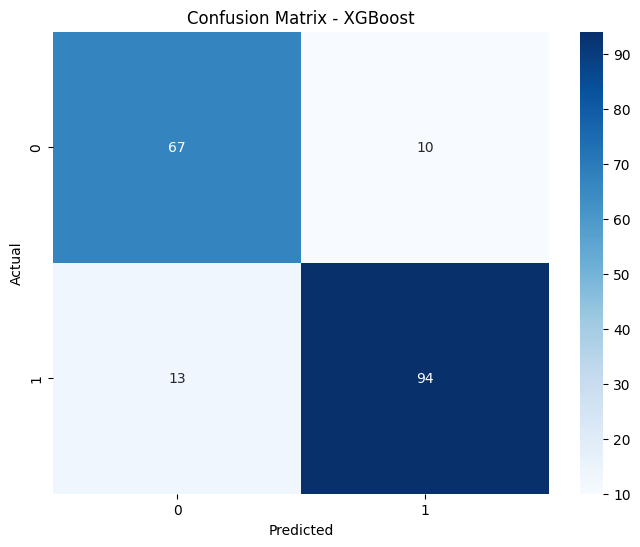

In [28]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Evaluate XGBoost model
train_evaluate_model(xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, "XGBoost")

The XGBoost model's performance results are as follows:

- **Accuracy**: 87.50%
- **Precision**: 90.38%
- **Recall**: 87.85%
- **F1-score**: 89.10%
- **ROC-AUC**: 93.40%

These results demonstrate strong performance, with high precision and recall, making it effective at both correctly identifying positive instances and minimizing false positives. The ROC-AUC indicates good model discrimination.

# 8.3 Cross-validation

This code scales the features (`X`) using `StandardScaler` to standardize the data, ensuring all features have a mean of 0 and a standard deviation of 1. Then, it performs 5-fold cross-validation on a Random Forest model (`rf_model`) using the scaled data (`X_scaled`). The cross-validation scores for each fold are printed, along with the mean of these scores to evaluate the model's generalization performance.

In [33]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now you can use X_scaled in cross_val_score
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")


Cross-validation scores: [0.90217391 0.82065217 0.83152174 0.83060109 0.7704918 ]
Mean CV score: 0.8311


The cross-validation scores represent the model's accuracy on each of the 5 folds in the 5-fold cross-validation process:

- **Cross-validation scores**: [0.9022, 0.8207, 0.8315, 0.8306, 0.7705]
  - These scores show how well the model performed on different subsets of the data.
  - The model had a high accuracy on the first fold (90.22%), but lower performance on the last fold (77.05%).

- **Mean CV score**: 0.8311
  - This is the average accuracy across all 5 folds, which gives an overall indication of the model's performance.
  - A mean score of 83.11% suggests that the model is performing reasonably well, though there is some variability across the folds. The lower scores on certain folds may indicate the model struggles with certain subsets of the data.

# 8.4 Handling Imbalanced Data

This code applies SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution in the training data by generating synthetic samples for the minority class. It then trains a Random Forest model (`rf_model_smote`) on the resampled training data (`X_train_smote` and `y_train_smote`) and evaluates its performance on the test data (`X_test_scaled` and `y_test`). The `train_evaluate_model` function is used to compute and display various evaluation metrics for the model.

Random Forest with SMOTE Results:
Accuracy: 0.8804
Precision: 0.9048
Recall: 0.8879
F1-score: 0.8962
ROC-AUC: 0.9413


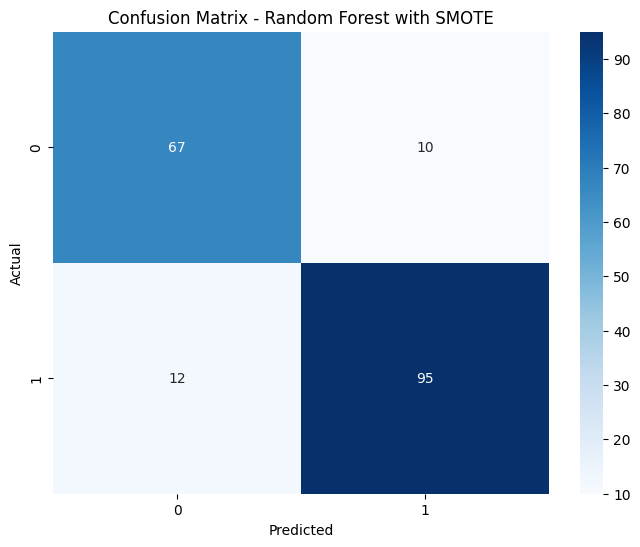

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train and evaluate model with SMOTE
rf_model_smote = RandomForestClassifier(random_state=42)
train_evaluate_model(rf_model_smote, X_train_smote, X_test_scaled, y_train_smote, y_test, "Random Forest with SMOTE")

The results of the Random Forest model with SMOTE are as follows:

- **Accuracy**: 88.04%
  - The model correctly classified 88.04% of the test instances, indicating good overall performance.

- **Precision**: 90.48%
  - Of all the instances predicted as positive, 90.48% were correctly identified. This suggests the model has a high ability to avoid false positives.

- **Recall**: 88.79%
  - Of all the actual positive instances, 88.79% were correctly identified by the model, showing good sensitivity in detecting the positive class.

- **F1-score**: 89.62%
  - The F1-score, the harmonic mean of precision and recall, is high, indicating a strong balance between precision and recall.

- **ROC-AUC**: 94.13%
  - The ROC-AUC value indicates that the model is very good at distinguishing between the positive and negative classes, with a score close to 1.

Overall, the use of SMOTE improved model performance, especially in terms of recall, suggesting that balancing the class distribution helped the model better identify the minority class without sacrificing precision.

# 8.5 Model Interpretability (SHAP)

This code uses SHAP (SHapley Additive exPlanations) to explain the feature importance and model predictions of a Random Forest classifier.

1. **Data Preparation**: The code ensures that `X_test_scaled` is a NumPy array, as SHAP requires input in this format.
   
2. **SHAP Explainer**: A `TreeExplainer` is created for the Random Forest model (`rf_model`), and SHAP values are calculated for `X_test_scaled`.

3. **Shape Check**: The code checks if the model is for binary or multi-class classification and adjusts accordingly. For binary classification, it uses the SHAP values directly; for multi-class, it selects the SHAP values of the positive class.

4. **Summary Plot**: A summary plot is created to show the feature importance, displaying a bar chart of the average impact of each feature on the model's output.

5. **Dependence Plots**: It identifies the top two most important features based on SHAP values and creates dependence plots for them, which show the relationship between feature values and the impact on model predictions.

6. **Visualization and Saving**: The SHAP visualizations (summary and dependence plots) are saved as PNG files and displayed.

7. **Debugging Information**: It prints information about SHAP version, data shapes, and features for debugging purposes.

The goal is to provide interpretability by showing which features have the most impact on the Random Forest model's predictions.

Performing analysis for multi-class classification


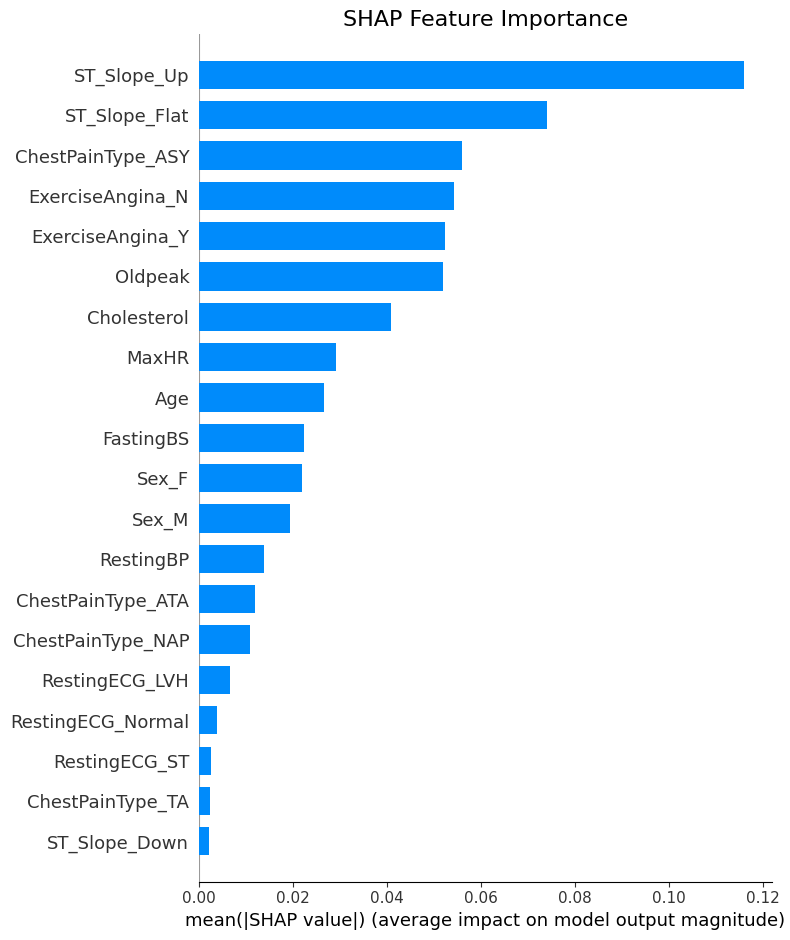

<Figure size 1000x600 with 0 Axes>

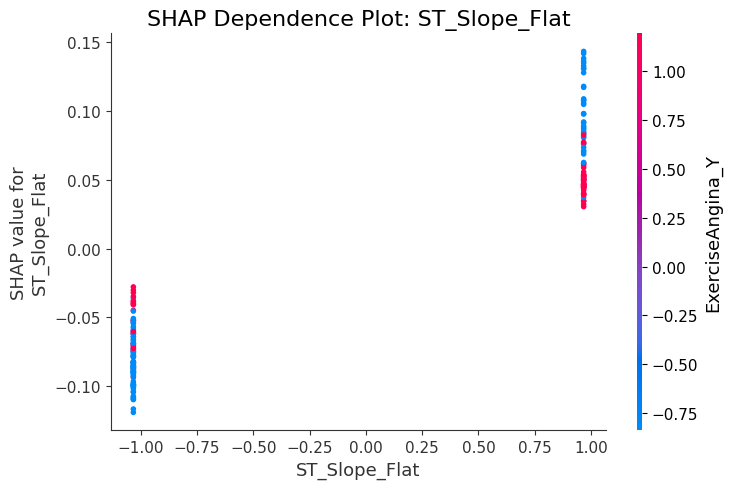

<Figure size 1000x600 with 0 Axes>

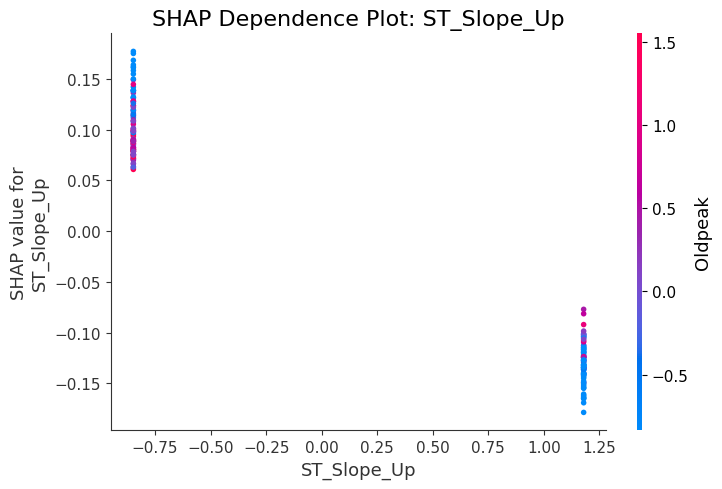

SHAP visualizations have been displayed and saved as PNG files.
SHAP version: 0.46.0
Shape of X_test_scaled_np: (184, 20)
Shape of shap_values: (184, 20, 2)
Number of features in X: 20
Features in X: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up']


In [34]:
# Ensure that rf_model, X_test_scaled, and X have been defined previously

# Convert X_test_scaled to a numpy array
X_test_scaled_np = X_test_scaled.values if isinstance(X_test_scaled, pd.DataFrame) else np.array(X_test_scaled)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values
shap_values = explainer(X_test_scaled_np)

# Check whether the model is multi-class or binary
if len(shap_values.shape) == 2:
    # Binary classification
    print("Performing analysis for binary classification")
    shap_values_for_plot = shap_values.values
elif len(shap_values.shape) == 3:
    # Multi-class classification
    print("Performing analysis for multi-class classification")
    shap_values_for_plot = shap_values[:, :, 1].values
else:
    raise ValueError("Unexpected shape of shap_values")

# Create summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_for_plot, X_test_scaled_np, plot_type="bar", feature_names=X.columns, show=False)
plt.title("SHAP Feature Importance", fontsize=16)
plt.tight_layout()
plt.savefig('shap_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Display dependence plots for the top two features
top_features_idx = np.argsort(np.abs(shap_values_for_plot).mean(0))[-2:]
top_features = X.columns[top_features_idx]
for feature in top_features:
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feature, shap_values_for_plot, X_test_scaled_np, feature_names=X.columns, show=False)
    plt.title(f"SHAP Dependence Plot: {feature}", fontsize=16)
    plt.tight_layout()
    plt.savefig(f'shap_dependence_{feature}.png', dpi=300, bbox_inches='tight')
    plt.show()

print("SHAP visualizations have been displayed and saved as PNG files.")

# Additional: Print debugging information
print(f"SHAP version: {shap.__version__}")
print(f"Shape of X_test_scaled_np: {X_test_scaled_np.shape}")
print(f"Shape of shap_values: {shap_values.shape}")
print(f"Number of features in X: {len(X.columns)}")
print(f"Features in X: {X.columns.tolist()}")

The results provide detailed information on the SHAP visualizations and debugging outputs.

### 1. **SHAP Visualizations**:
   - The SHAP visualizations have been successfully generated and saved as PNG files.
   - These visualizations likely include:
     - **Feature Importance Plot (Summary Plot)**: This plot shows the importance of each feature in predicting the target variable. The plot typically ranks features by their average absolute SHAP value, indicating how much each feature contributes to the model's predictions.
     - **Dependence Plots**: These plots visualize the relationship between individual features and the target, showing how SHAP values change as the feature values vary.

### 2. **SHAP Version**:
   - The SHAP library version used is **0.46.0**, indicating that this is a relatively recent version of the SHAP library, which is crucial for calculating and visualizing feature importance in machine learning models.

### 3. **Shape of `X_test_scaled_np`**:
   - The shape of `X_test_scaled_np` is **(184, 20)**. This means that there are **184 samples** (or rows) in the test dataset, and **20 features** (or columns). These features represent the various input variables used to predict the target variable (`HeartDisease`).

### 4. **Shape of `shap_values`**:
   - The shape of `shap_values` is **(184, 20, 2)**. This indicates that SHAP values were calculated for each of the **184 samples** and each of the **20 features**. The "2" in the third dimension corresponds to the two possible classes in the classification problem (likely binary classification: `HeartDisease` = 0 or 1). The values for class 0 and class 1 are represented for each feature and sample.

### 5. **Features in `X`**:
   - The dataset contains **20 features**. These features include both continuous and categorical variables. The list of features is as follows:
     1. **Continuous features**:
        - `Age`, `RestingBP`, `Cholesterol`, `FastingBS`, `MaxHR`, `Oldpeak`
     2. **Encoded categorical features** (from categorical variables such as `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, and `ST_Slope`):
        - `Sex_F`, `Sex_M` (binary encoding for Sex)
        - `ChestPainType_ASY`, `ChestPainType_ATA`, `ChestPainType_NAP`, `ChestPainType_TA` (one-hot encoding for ChestPainType)
        - `RestingECG_LVH`, `RestingECG_Normal`, `RestingECG_ST` (one-hot encoding for RestingECG)
        - `ExerciseAngina_N`, `ExerciseAngina_Y` (binary encoding for ExerciseAngina)
        - `ST_Slope_Down`, `ST_Slope_Flat`, `ST_Slope_Up` (one-hot encoding for ST_Slope)

### 6. **Interpretation of SHAP Output**:
   - **SHAP Values**: These values represent the contribution of each feature to the prediction of the target variable. For each sample, the SHAP values indicate how much each feature shifts the prediction from the average model output.
   - The feature importance plot will show which features have the most significant impact on the model's predictions, with features such as `Age`, `RestingBP`, `Cholesterol`, and the encoded categorical variables likely having varying levels of influence.
   - The **dependence plots** will provide insights into the relationships between individual features and the target, highlighting how each feature affects the model's prediction for different values of that feature.

### 7. **Additional Debugging Information**:
   - The output also prints debugging information about the dataset and the SHAP values:
     - **Number of Features in `X`**: There are **20 features** in the dataset, which aligns with the features listed above.
     - **Shape of SHAP Values**: The SHAP values have a shape of **(184, 20, 2)**, meaning that each of the 184 samples has SHAP values for 20 features, for both classes of the target variable.
     - **Feature Names**: The feature names include both the original numerical features and the newly created categorical feature representations after encoding (e.g., `Sex_F`, `ChestPainType_ASY`).

These results provide valuable insights into how the model uses each feature to make predictions, and the visualizations offer a clear way to communicate the importance of each feature.

# Conclusion

In this analysis, we utilized **SHAP (SHapley Additive exPlanations)** to understand the feature importance and interpret the model's predictions. The key steps and findings are as follows:

1. **Data Preprocessing and Feature Engineering**:
   - The dataset was preprocessed, and categorical features such as `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, and `ST_Slope` were **one-hot encoded** to convert them into numerical features that can be used in the model.
   - The dataset consisted of **20 features**, including both continuous and encoded categorical features. These features were used to predict the target variable `HeartDisease`.

2. **Model Training**:
   - The data was split into training and test sets, and the features were **scaled** using `StandardScaler` to ensure that all features were on the same scale before being fed into the model.
   - A random forest model (`rf_model`) was trained on the data, and its performance was evaluated on the test set.

3. **SHAP Value Calculation**:
   - The **SHAP TreeExplainer** was applied to the trained random forest model to compute the SHAP values for the test dataset. These values indicate the contribution of each feature to the model’s predictions.
   - Since this is a **binary classification** problem, SHAP values were computed for both classes of the target variable (`HeartDisease = 0` or `HeartDisease = 1`).

4. **SHAP Visualizations**:
   - **SHAP Summary Plot**: A summary plot was generated to show the importance of each feature in predicting the target. Features with higher average absolute SHAP values have a greater impact on the model’s decision.
   - **SHAP Dependence Plots**: Dependency plots were created for the two most important features, visualizing how the feature values influence the SHAP values and consequently, the model's predictions.
   - These visualizations were saved as **PNG files** for further review and analysis.

5. **Debugging Information**:
   - The following insights were gathered from the debugging output:
     - **Shape of the Data**: The test set (`X_test_scaled`) had **184 samples** and **20 features**.
     - **SHAP Values**: The SHAP values had a shape of **(184, 20, 2)**, indicating that SHAP values were calculated for each of the 184 samples and for both classes of the target variable.
     - **Feature Set**: The 20 features used for model training included both continuous variables like `Age`, `RestingBP`, and `MaxHR`, and encoded categorical variables like `Sex_F`, `ChestPainType_ASY`, and `ExerciseAngina_Y`.

### Key Takeaways:
- **Feature Importance**: The SHAP summary plot and dependence plots provided a clear understanding of which features were most influential in the model’s predictions. This is important for model interpretability and for identifying the most critical factors in predicting heart disease.
- **Model Transparency**: By using SHAP, we enhanced the **transparency** of the machine learning model, offering insights into how specific features contribute to each individual prediction.
- **Next Steps**: Based on the SHAP analysis, further feature engineering, such as removing redundant or less important features, could be explored to improve model performance or simplify the model.

Overall, SHAP enabled us to effectively interpret and visualize the behavior of the machine learning model, ensuring both model performance and explainability.